## Technical Lesson: Deep Learning with Normalization & Regularization


### Step 0: Set Up Your Environment


If needed.

In [ ]:
# ! pip install --upgrade tensorflow scikit-learn numpy matplotlib

### Step 1: Import Libraries and Load Data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
cal_data = fetch_california_housing()
X = cal_data.data
y = cal_data.target

print("Data shape:", X.shape)        # Should be (20640, 8)
print("Target shape:", y.shape)      # Should be (20640,)


Data shape: (20640, 8)
Target shape: (20640,)


### Step 2: Create a Validation Split

In [5]:
# Split into train and test first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Further split train data into train and validation
X_train_final, X_val, y_train_final, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

print("Training data shape:", X_train_final.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)


Training data shape: (13209, 8)
Validation data shape: (3303, 8)
Test data shape: (4128, 8)


### Step 3: Normalize the Data

In [6]:
scaler = StandardScaler()
scaler.fit(X_train_final)

X_train_scaled = scaler.transform(X_train_final)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("Feature means:", scaler.mean_)
print("Feature variances:", scaler.var_)


Feature means: [ 3.86893364e+00  2.85672647e+01  5.42040408e+00  1.09433536e+00
  1.42691650e+03  3.02944025e+00  3.56468476e+01 -1.19583303e+02]
Feature variances: [3.57143560e+00 1.58482738e+02 4.48993988e+00 1.45205080e-01
 1.29315681e+06 4.70353691e+01 4.55294423e+00 4.02078197e+00]


### Step 4: Build a Baseline Model (No Regularization)

In [7]:
baseline_model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)  # Single output for regression
])

baseline_model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse']
)

history_baseline = baseline_model.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.0608 - mae: 0.7229 - mse: 1.0608 - val_loss: 0.5821 - val_mae: 0.4793 - val_mse: 0.5821
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3871 - mae: 0.4454 - mse: 0.3871 - val_loss: 0.4822 - val_mae: 0.4404 - val_mse: 0.4822
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3577 - mae: 0.4208 - mse: 0.3577 - val_loss: 0.3636 - val_mae: 0.4335 - val_mse: 0.3636
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3418 - mae: 0.4127 - mse: 0.3418 - val_loss: 0.7470 - val_mae: 0.4626 - val_mse: 0.7470
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3706 - mae: 0.4184 - mse: 0.3706 - val_loss: 0.3531 - val_mae: 0.4176 - val_mse: 0.3531
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3223 - mae: 0.3972 - mse: 0.3223 - val_loss: 0.3605 - val_mae: 0.4104 - val_mse: 0.3605
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3175 - mae: 0.3939 - mse: 0.317

### Step 5: Add Batch Normalization

In [8]:
model_bn = keras.Sequential([
    layers.Dense(64, activation='linear', input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(64, activation='linear'),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(1)
])

model_bn.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse']
)

history_bn = model_bn.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.6580 - mae: 0.5974 - mse: 0.6580 - val_loss: 0.9798 - val_mae: 0.4901 - val_mse: 0.9798
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4329 - mae: 0.4775 - mse: 0.4329 - val_loss: 2.6851 - val_mae: 0.4798 - val_mse: 2.6851
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4066 - mae: 0.4637 - mse: 0.4066 - val_loss: 0.4643 - val_mae: 0.4738 - val_mse: 0.4643
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3982 - mae: 0.4589 - mse: 0.3982 - val_loss: 0.4734 - val_mae: 0.4859 - val_mse: 0.4734
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3849 - mae: 0.4474 - mse: 0.3849 - val_loss: 0.5083 - val_mae: 0.4609 - val_mse: 0.5083
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3712 - mae: 0.4366 - mse: 0.3712 - val_loss: 0.5459 - val_mae: 0.4658 - val_mse: 0.5459
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3613 - mae: 0.4307 - mse: 0.361

### Step 6: Incorporate Regularization (L2 + Dropout)

In [9]:
l2_reg = 1e-4
dropout_rate = 0.3

model_reg = keras.Sequential([
    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(l2_reg),
                 input_shape=(X_train.shape[1],)),
    layers.Dropout(dropout_rate),

    layers.Dense(64, activation='relu',
                 kernel_regularizer=regularizers.l2(l2_reg)),
    layers.Dropout(dropout_rate),

    layers.Dense(1)
])

model_reg.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae','mse']
)

history_reg = model_reg.fit(
    X_train_scaled, y_train_final,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 1.7567 - mae: 0.9228 - mse: 1.7487 - val_loss: 0.5365 - val_mae: 0.4974 - val_mse: 0.5286
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.6613 - mae: 0.5713 - mse: 0.6533 - val_loss: 0.4850 - val_mae: 0.4679 - val_mse: 0.4770
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.5307 - mae: 0.5136 - mse: 0.5227 - val_loss: 0.6296 - val_mae: 0.4673 - val_mse: 0.6215
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.5974 - mae: 0.4972 - mse: 0.5893 - val_loss: 0.4198 - val_mae: 0.4479 - val_mse: 0.4116
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.4895 - mae: 0.4919 - mse: 0.4813 - val_loss: 0.4221 - val_mae: 0.4495 - val_mse: 0.4138
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4637 - mae: 0.4837 - mse: 0.4554 - val_loss: 0.4006 - val_mae: 0.4414 - val_mse: 0.3923
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4520 - mae: 0.4714 - mse: 0.443

### Step 7: Evaluate and Compare Models

In [10]:
print("=== Baseline Model ===")
train_scores = baseline_model.evaluate(X_train_scaled, y_train_final, verbose=0)
val_scores   = baseline_model.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Train MAE: {train_scores[1]:.4f}, Train MSE: {train_scores[2]:.4f}")
print(f"Val   MAE: {val_scores[1]:.4f}, Val   MSE: {val_scores[2]:.4f}")

print("\n=== BatchNorm Model ===")
train_scores_bn = model_bn.evaluate(X_train_scaled, y_train_final, verbose=0)
val_scores_bn   = model_bn.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Train MAE: {train_scores_bn[1]:.4f}, Train MSE: {train_scores_bn[2]:.4f}")
print(f"Val   MAE: {val_scores_bn[1]:.4f}, Val   MSE: {val_scores_bn[2]:.4f}")

print("\n=== Regularized Model (L2 + Dropout) ===")
train_scores_reg = model_reg.evaluate(X_train_scaled, y_train_final, verbose=0)
val_scores_reg   = model_reg.evaluate(X_val_scaled, y_val, verbose=0)
print(f"Train MAE: {train_scores_reg[1]:.4f}, Train MSE: {train_scores_reg[2]:.4f}")
print(f"Val   MAE: {val_scores_reg[1]:.4f}, Val   MSE: {val_scores_reg[2]:.4f}")


=== Baseline Model ===
Train MAE: 0.3097, Train MSE: 0.2032
Val   MAE: 0.3609, Val   MSE: 0.2948

=== BatchNorm Model ===
Train MAE: 0.4280, Train MSE: 0.4333
Val   MAE: 0.4456, Val   MSE: 0.4765

=== Regularized Model (L2 + Dropout) ===
Train MAE: 0.3583, Train MSE: 0.2625
Val   MAE: 0.3797, Val   MSE: 0.2968


### Step 8: Test Set for Final Performance

In [11]:
test_scores_reg = model_reg.evaluate(X_test_scaled, y_test, verbose=0)
print("\n[Regularized Model on Test Set]")
print(f"Test MAE: {test_scores_reg[1]:.4f}, Test MSE: {test_scores_reg[2]:.4f}")



[Regularized Model on Test Set]
Test MAE: 0.3758, Test MSE: 0.2884


### Step 9: Visualize Training Curves

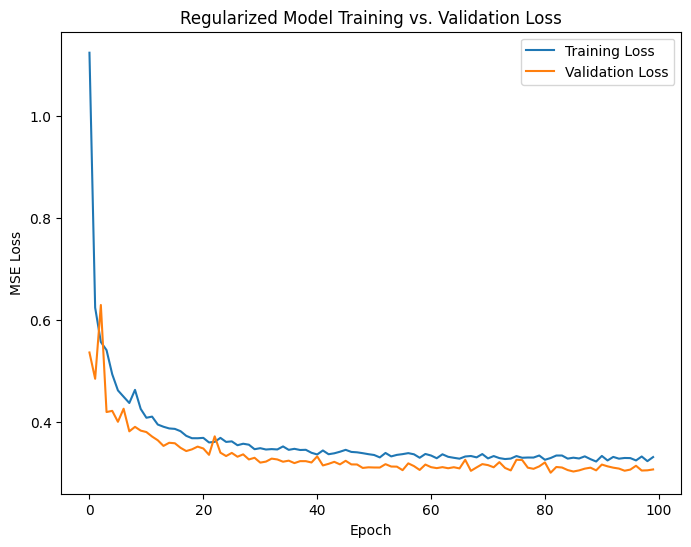

In [12]:
plt.figure(figsize=(8,6))
plt.plot(history_reg.history['loss'], label='Training Loss')
plt.plot(history_reg.history['val_loss'], label='Validation Loss')
plt.title('Regularized Model Training vs. Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()
